In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from dtreeviz.trees import dtreeviz 

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.isna().sum().sum()

0

In [4]:
y = df.Species
x = df.iloc[:,1:-1]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y_values = y.unique()
print(y_values)
y_map = {y_values[i]: i for i in range(len(y_values))}
y = y.map(y_map)
y

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 4, 8, 10, 12, 16, 18, 20],
    'max_leaf_nodes' : [4, 6, 8],
    'max_features' : ['auto', 'sqrt', 'log2'],
}

clf = GridSearchCV(dt, params, verbose = True)
clf.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 10, 12, 16, 18, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [4, 6, 8]},
             verbose=True)

In [8]:
print(clf.best_params_) 
print(clf.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': 8}
0.9666666666666666


In [11]:
prdc = clf.predict(x_test)
print(classification_report(y_test, prdc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.75      0.86         4
           2       0.94      1.00      0.97        16

    accuracy                           0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.96        30



In [12]:
print(confusion_matrix(y_test, prdc))

[[10  0  0]
 [ 0  3  1]
 [ 0  0 16]]


In [13]:
dt = DecisionTreeClassifier()
dt.set_params(**clf.best_params_)
dt.fit(x, y)

DecisionTreeClassifier(max_depth=10, max_features='auto', max_leaf_nodes=8)

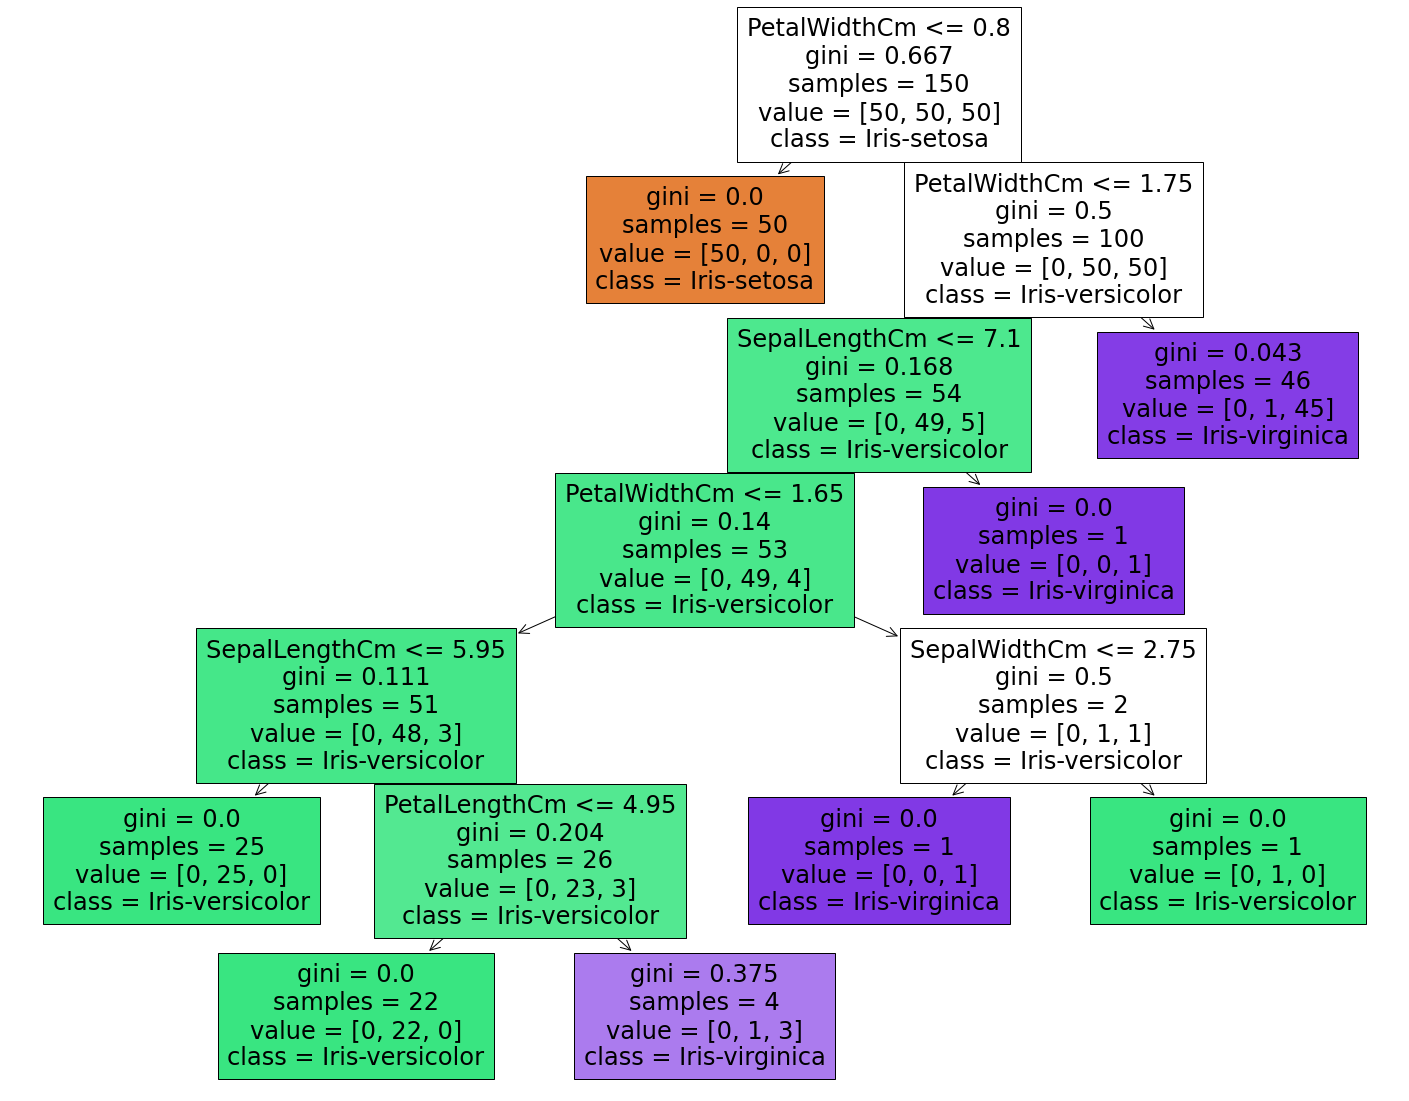

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
plot_tree(dt, feature_names = x.columns, class_names = list(y_values), filled = True, impurity = True)
plt.show()

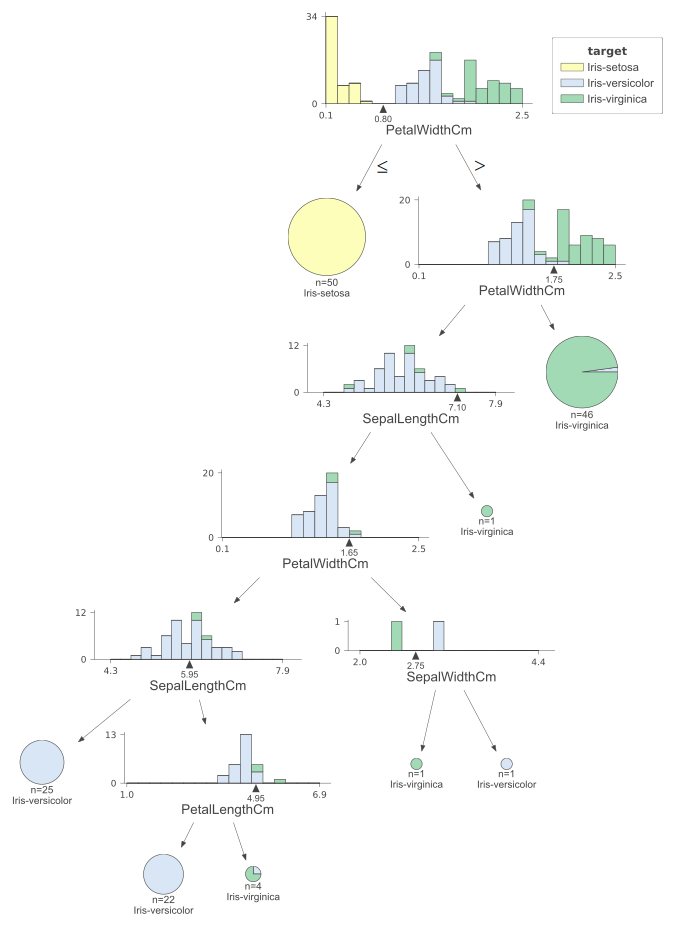

In [25]:
viz = dtreeviz(dt, x, y,
                target_name="target",
                feature_names=x.columns,
                class_names= list(y_values),
                scale = 1.5)

viz